In [11]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import math, time
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [12]:
data = pd.read_csv('data.csv',delimiter=',',encoding='latin-1')
data.head()

,paperid,reviewerid,completed,total_sum,pccomments,authorcomments,q1,q2,q3,q4,q5,q6,q7,title,keywords,abstract,accept,type_presentation
0,2,8962,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Demo Paper,Testing,Will be updated soon!,Reject,NaN
1,6,8178,T,19.0,"<p>Overall, the paper has useful information, ...",<p>The subject paper presents a reduced switch...,4.0,3.0,2.0,2.0,3.0,Oral Presentation,5.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN
2,6,9227,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN
3,6,9261,T,18.0,0,"<p>May be accepted, but need to improve. What ...",2.0,3.0,3.0,2.0,3.0,Poster Presentation,5.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN
4,6,9390,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN


In [13]:
dataset = data[['reviewerid','authorcomments', 'total_sum', 'title', 'keywords', 'abstract', 'accept']]

In [14]:
dataset.head(3)

,reviewerid,authorcomments,total_sum,title,keywords,abstract,accept
0,8962,NaN,NaN,Demo Paper,Testing,Will be updated soon!,Reject
1,8178,<p>The subject paper presents a reduced switch...,19.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject
2,9227,NaN,NaN,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject


In [15]:
df = dataset

In [16]:
dataset = dataset.dropna()

In [17]:
dataset.head()

,reviewerid,authorcomments,total_sum,title,keywords,abstract,accept
1,8178,<p>The subject paper presents a reduced switch...,19.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject
3,9261,"<p>May be accepted, but need to improve. What ...",18.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject
7,9027,<p>Please edit the following errors:<br /><br ...,23.0,"GSM Based Low-cost Gas Leakage, Explosion and ...","Arduino UNO, MQ-9, Low-cost, Explosion, Securi...",Gas leakage and gas cylinder explosion is a re...,Accept
8,9464,<ol>\r\n<li>There is no previous work section....,20.0,"GSM Based Low-cost Gas Leakage, Explosion and ...","Arduino UNO, MQ-9, Low-cost, Explosion, Securi...",Gas leakage and gas cylinder explosion is a re...,Accept
9,8967,<p>The paper present multi-view 3D object is r...,23.0,Multi-View 3D Object Retrieval using Autoencod...,"Convolutional Neural Network, Deep Embedding N...","Due to the rapid development of 3D object, the...",Accept


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
dataset['authorcomments'] = dataset['authorcomments'].str.strip()
dataset['title'] = dataset['title'].str.strip()
dataset['keywords'] = dataset['keywords'].str.strip()
dataset['abstract'] = dataset['abstract'].str.strip()
dataset['accept'] = dataset['accept'].str.strip()

In [20]:
import bs4
dataset['authorcomments'] = dataset['authorcomments'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())
dataset['accept'] = dataset['accept'].map({'Reject':0, 'Accept':1})
dataset = dataset.dropna()
dataset['accept'] = dataset['accept'].astype(int)

In [21]:
dataset.head(3)

,reviewerid,authorcomments,total_sum,title,keywords,abstract,accept
1,8178,The subject paper presents a reduced switch se...,19.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",0
3,9261,"May be accepted, but need to improve. What are...",18.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",0
7,9027,Please edit the following errors:# Spelling Er...,23.0,"GSM Based Low-cost Gas Leakage, Explosion and ...","Arduino UNO, MQ-9, Low-cost, Explosion, Securi...",Gas leakage and gas cylinder explosion is a re...,1


In [22]:
dataset.to_csv(r'clean.csv')

In [23]:
df.drop(['reviewerid', 'total_sum'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 5 columns):
authorcomments    1849 non-null object
title             2734 non-null object
keywords          2734 non-null object
abstract          2734 non-null object
accept            2734 non-null object
dtypes: object(5)
memory usage: 106.9+ KB


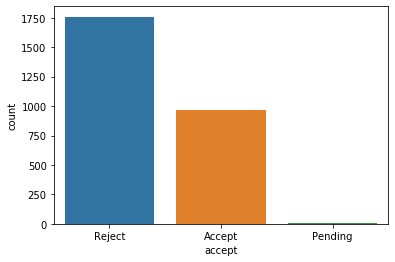

In [25]:
sns.countplot(df.accept)

In [26]:
df = df[['abstract', 'accept']]

In [27]:
df.dropna(inplace=True)

In [28]:
df['accept'] = df['accept'].map({'Reject':0, 'Accept':1})
df = df.dropna()
df['accept'] = df['accept'].astype(int)

In [29]:
X = df.abstract
#[['authorcomments', 'title', 'keywords', 'abstract']]

In [30]:
Y = df.accept

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)

In [32]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [23]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [24]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
drop

In [25]:
print(X.shape)
print(Y.shape)

(2727,)
(2727,)


In [26]:
history = model.fit(sequences_matrix,y_train,batch_size=50,epochs=25,
          validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1853 samples, validate on 464 samples
Epoch 1/25
1853/1853 [==============================] - 5s 3ms/step - loss: 0.6518 - acc: 0.6341 - val_loss: 0.6788 - val_acc: 0.6767
Epoch 2/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.4738 - acc: 0.7982 - val_loss: 0.5028 - val_acc: 0.7629
Epoch 3/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.3011 - acc: 0.8807 - val_loss: 0.4024 - val_acc: 0.8211
Epoch 4/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.1944 - acc: 0.9336 - val_loss: 0.3121 - val_acc: 0.8793
Epoch 5/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.1427 - acc: 0.9530 - val_loss: 0.2984 - val_acc: 0.8858
Epoch 6/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.1164 - acc: 0.9649 - val_loss: 0.2357 - val_acc: 0.9267
Epoch 7/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.0740 - acc: 0.9822 - va

In [37]:
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [28]:
accr = model.evaluate(test_sequences_matrix,y_test)

410/410 [==============================] - 0s 654us/step


In [29]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.269
  Accuracy: 0.966


In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

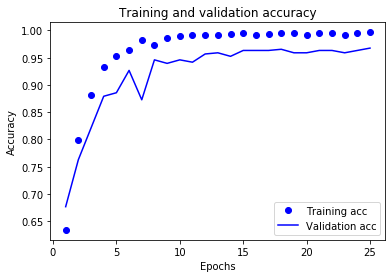

In [32]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(sequences_matrix, y_train)

In [ ]:
y_pred = svclassifier.predict(test_sequences_matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))